In [63]:
# param
TAR_FILE_NAME = 'data0627.tar'
steerings_range = list(range(-50, 55, 5))
ratio = 0.9


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/ai_training/raw_data/$TAR_FILE_NAME /content/data.tar
!tar xvf data.tar

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dist(df, title='', subplot=None):
    steerings_count = [len(df.loc[df['steering'] == r]) for r in steerings_range]
    steerings_dist = pd.DataFrame({
        'steering': steerings_range,
        'count': steerings_count
    })
    
    if subplot:
        plt.subplot(*subplot)

    plt.bar(steerings_range, steerings_count, width=4)
    plt.xlabel('steering')
    plt.ylabel('count')
    plt.title(title)

    if not subplot:
        plt.show()

In [65]:
import pandas as pd
import json

# trans json data to dataframe
with open('data/motor_im_map.json', 'r') as f:
  json_data = json.loads(f.read())

raw_data = {
    'im_key': [],
    'speed': [],
    'steering': [],
}

for im_key, (speed, steering) in json_data.items():
  raw_data['im_key'].append(im_key)
  raw_data['speed'].append(speed)
  raw_data['steering'].append(steering)

df = pd.DataFrame(raw_data)
print(df)

                                    im_key  speed  steering
0     c17c7f70-d749-11eb-8e4b-984827de9286      0         0
1     c1be0080-d749-11eb-8e4b-984827de9286      0         0
2     c1c2c318-d749-11eb-8e4b-984827de9286      0         0
3     c1c748a2-d749-11eb-8e4b-984827de9286      0         0
4     c1cbfa3c-d749-11eb-8e4b-984827de9286      0         0
...                                    ...    ...       ...
7203  3af81980-d74b-11eb-8e4b-984827de9286     85        25
7204  3afff114-d74b-11eb-8e4b-984827de9286     85        30
7205  3b07dba4-d74b-11eb-8e4b-984827de9286     85        35
7206  3b0fc9f4-d74b-11eb-8e4b-984827de9286     85        40
7207  3b179d28-d74b-11eb-8e4b-984827de9286     85        45

[7208 rows x 3 columns]


In [67]:
def seperate_data(df, max_dataset=None):
    train_df = pd.DataFrame(columns=df.columns)
    test_df = pd.DataFrame(columns=df.columns)

    for steering in steerings_range:
        _df = df.loc[df['steering'] == steering]

        if max_dataset and len(_df) > max_dataset:
            _df = _df.sample(n=max_dataset)

        train_temp = _df.sample(frac=ratio)
        test_temp = _df.drop(train_temp.index)

        train_df = train_df.append(train_temp)
        test_df = test_df.append(test_temp)

    return train_df, test_df


# remove speed == 0
df_2 = df.loc[df['speed'] != 0]
# seperate
train_df, test_df = seperate_data(df_2, max_dataset=400)

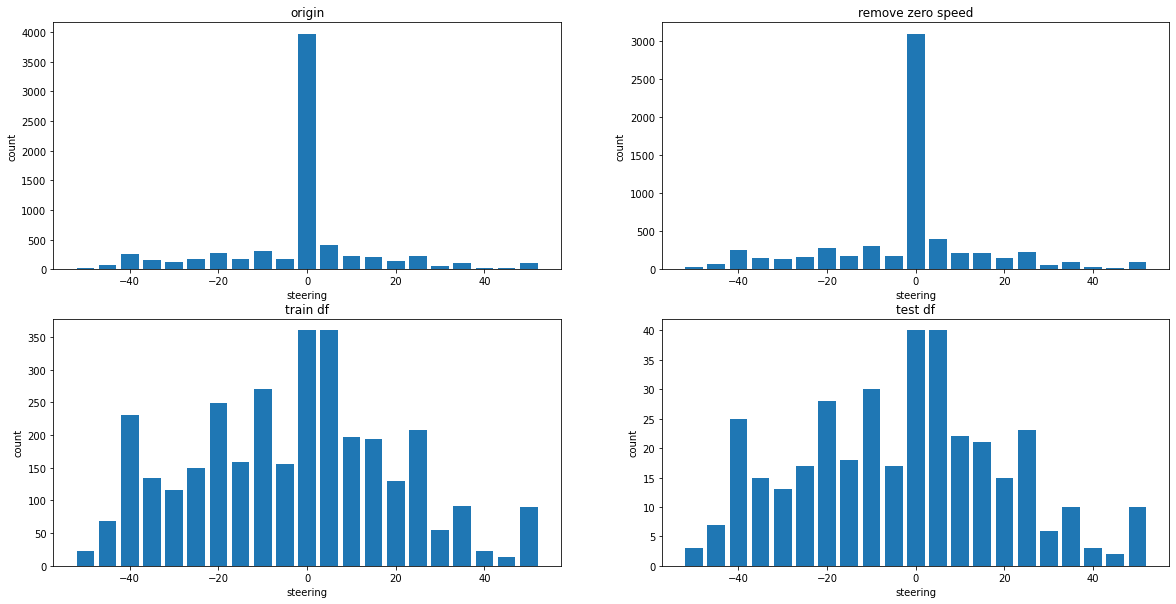

In [68]:
# origin df
plt.rcParams['figure.figsize'] = [20, 10]
plot_dist(df, 'origin', (2, 2, 1))
plot_dist(df_2, 'remove zero speed', (2, 2, 2))
plot_dist(train_df, 'train df', (2, 2, 3))
plot_dist(test_df, 'test df', (2, 2, 4))

In [81]:
# shuffle
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

import os

if not os.path.exists('clean_data'):
    os.mkdir('clean_data')
    os.mkdir('clean_data/img')

train_df.to_csv('clean_data/train.csv', index=False)
test_df.to_csv('clean_data/test.csv', index=False)

In [83]:
from shutil import copyfile

# cp img data
for k in train_df.append(test_df)['im_key']:
    copyfile(f'data/img/{k}.jpg', f'clean_data/img/{k}.jpg')

In [ ]:
!tar cvf clean_data.tar clean_data